In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [2]:
url = ('formula1.csv')
datos = pd.read_csv(url)

# Transformaciones a algunas columnas.
datos['positionOrder'] = datos['positionOrder'].astype('int64')
datos['grid'] = datos['grid'].astype('int64')
datos['rankfast'] = datos['rankfast'].astype('int64')
datos['fastestLapTime'] = pd.to_datetime(datos['fastestLapTime'], errors='coerce')

#datos = datos.dropna()

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   resultId         1619 non-null   int64         
 1   raceId           1619 non-null   int64         
 2   driverId         1619 non-null   int64         
 3   constructorId    1619 non-null   int64         
 4   number           1619 non-null   int64         
 5   grid             1619 non-null   int64         
 6   position         1619 non-null   object        
 7   positionText     1619 non-null   object        
 8   positionOrder    1619 non-null   int64         
 9   points           1619 non-null   float64       
 10  laps             1619 non-null   int64         
 11  time             1619 non-null   object        
 12  milliseconds     1619 non-null   object        
 13  fastestLap       1619 non-null   object        
 14  rankfast         1619 non-null   int64  

In [3]:
url_results = ('results.csv')
datos_total = pd.read_csv(url_results)

datos_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [7]:
Unique_Drivers = datos["driverId"].unique()
datos_total2 = datos_total[['driverId','resultId']]
filtered_df = datos_total2[datos_total2.driverId.isin(Unique_Drivers)]
freq = filtered_df.groupby(['driverId']).count() 
cuentas = pd.DataFrame(freq)
cuentas_1 = cuentas.set_axis(['exp_driver'], axis=1)
cuentas_1["rank_exp_driver"] = cuentas_1.rank(method="min",ascending=False)
cuentas_1

,exp_driver,rank_exp_driver
driverId,,
1,288,3.0
4,336,2.0
8,352,1.0
9,99,15.0
20,280,4.0
154,181,8.0
807,182,7.0
815,215,5.0
817,210,6.0


In [8]:
datos['rank_exp_driver'] = datos["driverId"].map(cuentas_1["rank_exp_driver"])
print (datos)

      resultId  raceId  driverId  constructorId  number  grid position  \
0        23783     989         1            131      44     1        2   
1        23784     989         8              6       7     2        3   
2        23782     989        20              6       5     3        1   
3        23787     989       830              9      33     4        6   
4        23798     989       825            210      20     5       \N   
...        ...     ...       ...            ...     ...   ...      ...   
1614     25396    1073        20            117       5    15       11   
1615     25401    1073       849              3       6    16       \N   
1616     25403    1073       847              3      63    17       \N   
1617     25404    1073         8             51       7    18       \N   
1618     25399    1073       854            210      47    19       14   

     positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
0               2              2    

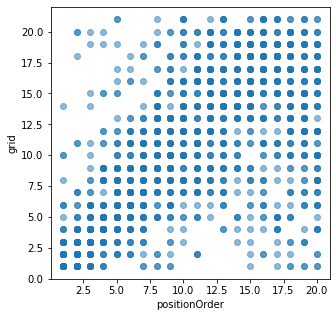

In [9]:
# Gráfico correlación entre Posición de salida y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.grid, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('grid');

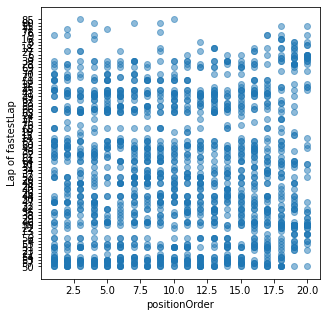

In [10]:
# Gráfico correlación entre número de vuelta mas rapida y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.fastestLap, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('Lap of fastestLap');

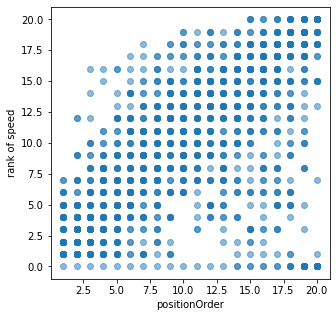

In [11]:
# Gráfico correlación entre rank de vuelta más rapida y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.rankfast, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank of speed');

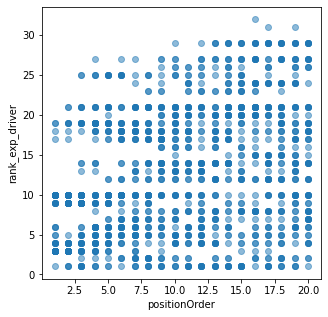

In [12]:
# Gráfico correlación entre rank de vuelta más rapida y resultado final
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x=datos.positionOrder, y=datos.rank_exp_driver, alpha=.5)
ax.set_xlabel('positionOrder')
ax.set_ylabel('rank_exp_driver');